# Second Hand Cars Re-selling Price Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #numerical operations
import pandas as pd #dataframe operations and data analysis
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting 
import statsmodels.api as sm #statistical operations
import os # OS operations
sns.set()

from math import * 
import warnings
warnings.filterwarnings('ignore')

### Loading the Raw Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Regression/Second Hand Car Analysis/Second hand cars reselling price.csv')

In [ ]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


Our data is quite a big data with almost of 4500 rows.
Here, we are supposed to analyse the price of the second hand car. Now, the price of cars depends upon the following variables from the data.

1. Brand :
   The BMW car will be expensive than the Toyota.
2. Mileage :
   The greater the mileage the expensive the car.
3. EngineV :
   The greater the engine volumn the expensive the car. As sports cars are expensive than the family car.
4. Year :
   The older the car the cheap its price.


In [ ]:
data.shape

(4345, 9)

### Preprocessing

In [ ]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From the descriptive statistics we can infer that there are some missing values in our data. Lets check for them.

In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Yeah! We have some missing values in the columns "Prics" and "EngineV". Let's treat the well.

### Determining the variables of interest

In [ ]:
data1 = data.drop(['Model'] , axis = 1)

Dropping the data from the table requires two arguments, the row/column we want to drop and its axis. Axis = 0 means row and axis = 1 means column. Here, we are dropping the column 'Model' as it is not significant for our analysis and can creat huge variability in our analysis due to large number of unique values.

In [ ]:
data1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [ ]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Now, we have two columns with missing values, and we have to deal with them well. As the number of missing values is less than 5% as compared to total number of rows, we'll drop the rows with the missing values in these columns.

In [ ]:
data_no_mv = data1.dropna(axis = 0)

In [ ]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

Great!! Now we have no missing values in our data. 

### Dealing with outliers

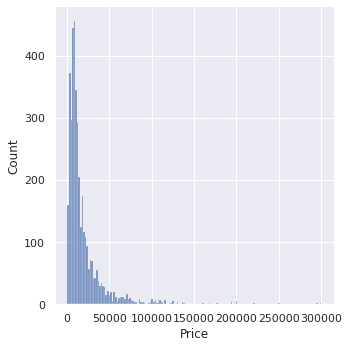

In [ ]:
sns.displot(data_no_mv['Price'])
plt.show()

From the PDF of Prices, we can say that the prices are distributed with a positive skewness. This can create problem in our regression. We have to remove the outliers. We can do that using the quantile method. We will be keeping the 99 percentile values of the prices from our data. Let's see what happens.

In [ ]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


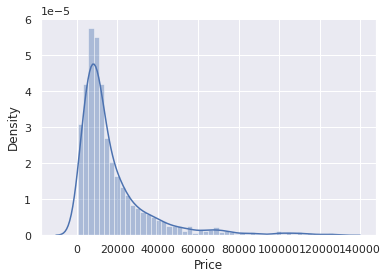

In [ ]:
sns.distplot(data_1['Price'])
plt.show()

We can still observe the skewness in our PDF for Prices, but this is something which can not be ignored now. Let's see what we get in our further analysis.

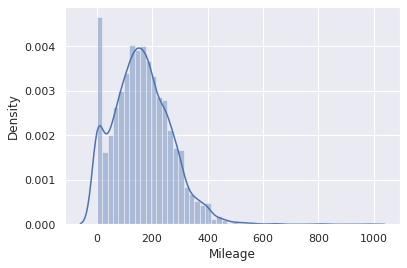

In [ ]:
sns.distplot(data_no_mv['Mileage'])
plt.show()

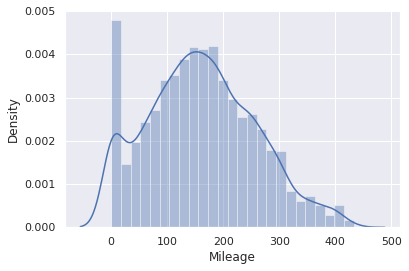

In [ ]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.distplot(data_2['Mileage'])
plt.show()

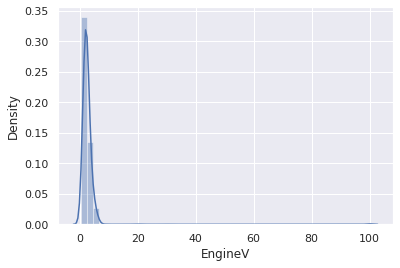

In [ ]:
sns.distplot(data_no_mv['EngineV'])
plt.show()

Woah!! There are huge outliers in the 'EngineV' column. Why is this so.
On observing the data manually, we get to know that the column has some values equal to 99.99. This is because, generally we fill up the null cells with this values. But, in general the value of the engine volume of a car cannot be more than 6.5 or less than 0.6. So, we have to deal with this blunder now as well. Let's do that.

In [ ]:
data_3 = data_2[data_2['EngineV'] < 6.5]

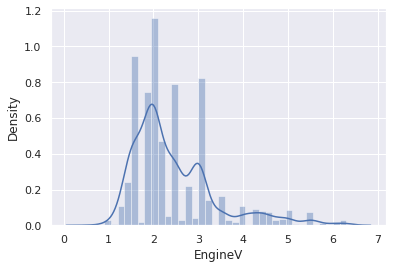

In [ ]:
sns.distplot(data_3['EngineV'])
plt.show()

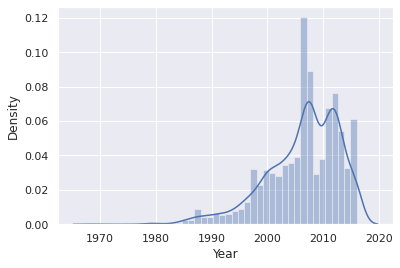

In [ ]:
sns.distplot(data_3['Year'])
plt.show()

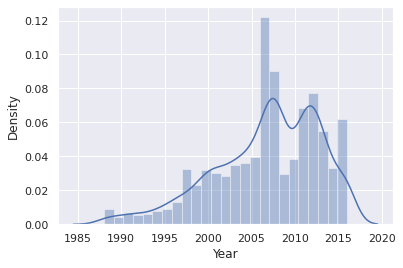

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.distplot(data_4['Year'])
plt.show()

In [ ]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [ ]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

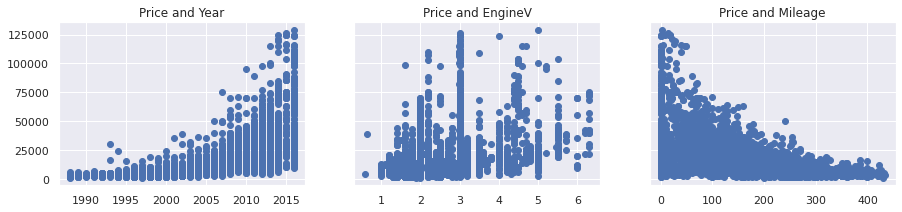

In [ ]:
#plotting all independent variables against out dependent variable "Price"

f , (ax1 , ax2 , ax3) = plt.subplots(1 , 3 , sharey = True , figsize = (15,3))

ax1.scatter(data_cleaned['Year'] , data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'] , data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'] , data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

From the scatter plots we can sport patterns between the dependent and the independent variables of our data but these are not the linear ones. To make our data best fit for the linear regression model, we have to transform our data to get a linear relationship between the dependent and the independent varibles.

### Log Transformation

In [ ]:
log_price =np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


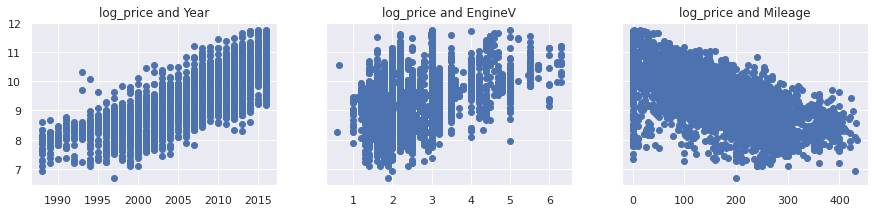

In [ ]:
#plotting all independent variables against out dependent variable "log_price"

f , (ax1 , ax2 , ax3) = plt.subplots(1 , 3 , sharey = True , figsize = (15,3))

ax1.scatter(data_cleaned['Year'] , data_cleaned['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(data_cleaned['EngineV'] , data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(data_cleaned['Mileage'] , data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

Now, the pattern is much more linear. Good Job!!

In [ ]:
data_cleaned = data_cleaned.drop(['Price'] , axis = 1)

### Removing Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year' , 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [ ]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


From the VIF data frame, we can observe that the variable "Year" has high multicollinearity. Shp, we shall drop this.

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'] , axis = 1)

In [ ]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


Okay!!

Our Data is now ready for analysis. Let's Go!!

### Creating dummies

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity , drop_first = True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Great! 
Our data is now completely numerical as we have created dummies for all the categorical data. 
Let's now re-arrange the columns to make our data frame a bit tidy.

In [ ]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Downloading Preprocessed Data

In [ ]:
data_preprocessed.to_csv('data_preprocessed.csv')
data_preprocessed = pd.read_csv('data_preprocessed.csv')

### Linear Regression Model

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'] , axis = 1)

### Scaling the data

In [ ]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled = scalar.transform(inputs)

### Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(inputs_scaled , targets , test_size = 0.25 , random_state = 365)

In [ ]:
x_train

array([[-1.34406430e-03,  1.41612724e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.50131983e+00,  2.56758184e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 6.98465416e-01,  1.93160124e+00, -5.79639358e-01, ...,
        -1.62113726e-01, -7.50101044e-01, -3.11119881e+00],
       ...,
       [-1.01387251e+00,  6.44065640e-01,  3.21266937e+00, ...,
        -1.62113726e-01,  1.33315372e+00,  3.21419511e-01],
       [ 7.23554617e-01, -1.29247164e+00,  5.79121641e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.55329031e+00,  8.53421022e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01]])

In [ ]:
y_train

1931     9.341369
3608     9.464983
2712     8.318742
1229     9.449357
1734    10.273325
          ...    
428     11.074421
859     10.434116
801      9.928180
2740    10.609057
3666     8.824678
Name: log_price, Length: 2899, dtype: float64

### Creating the Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [ ]:
yhat = reg.predict(x_train)

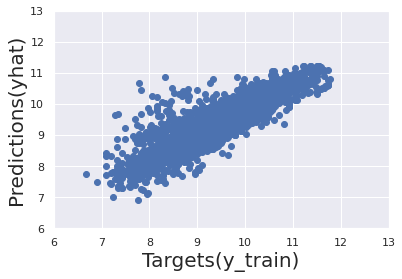

In [ ]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

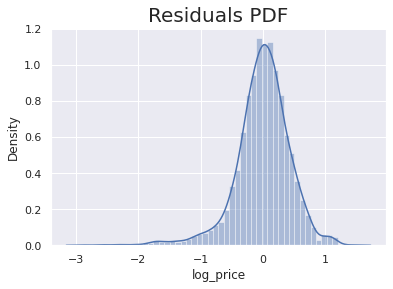

In [ ]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF" , size = 20)
plt.show()

In [ ]:
reg.score(x_train , y_train)

0.7451494225273487

### Finding the weighs and bias

In [ ]:
reg.intercept_

9.416679846154171

In [ ]:
reg.coef_

array([-0.00174668, -0.44989337,  0.21269329,  0.00081477,  0.00407662,
       -0.13817763, -0.18857294, -0.06228124, -0.09250456, -0.15037925,
       -0.09887957, -0.19579238, -0.12473283, -0.16030906, -0.12065016,
       -0.03757449, -0.15276342,  0.3203097 ])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values , columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Unnamed: 0,-0.001747
1,Mileage,-0.449893
2,EngineV,0.212693
3,Brand_BMW,0.000815
4,Brand_Mercedes-Benz,0.004077
5,Brand_Mitsubishi,-0.138178
6,Brand_Renault,-0.188573
7,Brand_Toyota,-0.062281
8,Brand_Volkswagen,-0.092505
9,Body_hatch,-0.150379


From the summary table, we can observe that some of the dummis are positive but some are negative. This means the relation of these variables with our target variable "Price" or "log price".
For a positive value of the dummy means it is directly proportional to the target variable and for the negative value for the dummy, the dummy variable is inversley proportional to the target variable.

Now, observing the brands, the relation is a bit different. The values of brans are positive and negative based on the value of the "Audi" brand, as it was the benchmark variable while we assigned the dummies. This, for positive value of a brand means this brand car is expensive than the "Audi" brand car, and if it's negative means it's cheaper than the "Audi".

In [ ]:
y_hat_test = reg.predict(x_test)

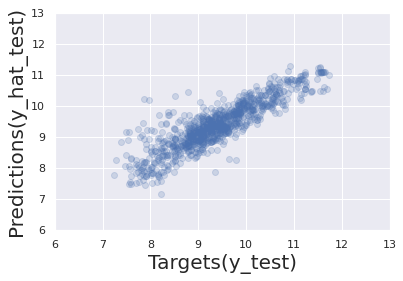

In [ ]:
plt.scatter(y_test , y_hat_test , alpha = 0.2)
plt.xlabel('Targets(y_test)',fontsize=20)
plt.ylabel('Predictions(y_hat_test)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Predictions'])
df_pf.head()

,Predictions
0,10691.158455
1,8199.295244
2,6748.051995
3,7566.974426
4,11356.875404


In [ ]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10691.158455,2300.0
1,8199.295244,13200.0
2,6748.051995,8100.0
3,7566.974426,6400.0
4,11356.875404,9150.0
...,...,...
962,3716.355928,2500.0
963,10799.962127,16500.0
964,30587.755733,40500.0
965,11283.414276,8200.0


In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10691.158455,2300.0,-8391.158455,364.832976
1,8199.295244,13200.0,5000.704756,37.884127
2,6748.051995,8100.0,1351.948005,16.690716
3,7566.974426,6400.0,-1166.974426,18.233975
4,11356.875404,9150.0,-2206.875404,24.118857
...,...,...,...,...
962,3716.355928,2500.0,-1216.355928,48.654237
963,10799.962127,16500.0,5700.037873,34.545684
964,30587.755733,40500.0,9912.244267,24.474677
965,11283.414276,8200.0,-3083.414276,37.602613


In [ ]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,967.000000,967.000000,967.000000,967.000000
mean,15925.759374,18051.489235,2125.729861,36.434191
std,13262.949089,19925.420780,10344.970349,63.821652
min,1306.918112,1400.000000,-28629.745414,0.019869
25%,7421.393407,6900.000000,-2011.243983,10.499259
50%,11666.953948,11200.000000,127.603461,23.661753
75%,19524.915598,20488.770000,3146.612792,38.563680
max,79615.045883,124000.000000,80413.626919,972.068508


From the descriptive statistics of the df_pf data frame, we can say that for most of the observations our predictions were quite good, but as there were large number of outliers, our model didn't performed well there,

In [ ]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
280,12496.516625,12499.00,2.483375,0.019869
954,3097.719431,3100.00,2.280569,0.073567
698,30440.703675,30500.00,59.296325,0.194414
242,7516.834736,7500.00,-16.834736,0.224463
528,18753.469531,18800.00,46.530469,0.247502
574,12963.452305,13000.00,36.547695,0.281136
391,51866.080110,52055.25,189.169890,0.363402
317,11547.584987,11500.00,-47.584987,0.413782
114,27435.625390,27300.00,-135.625390,0.496796
836,16886.199255,16800.00,-86.199255,0.513091


### Conclusion


From our analysis and the linear regression model, we can say that our model fits the data set and predicts the correct values fairly good but it's not an outstanding model. We can also create a much better fitting model but this is always a trail and test method, the more our model is tested, the more perfect it becomes.

But, this much was good for now, so GOOD JOB !!